# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

### - Data Validation: 
For columns  calories,  carbohydrate, sugar, protein etc numeric columns, dropped rows where all those columns are missing. 
For 'category' column, we string replaced 'Chicken Breast' with 'Chicken' because 'Chicken Breast' is not an allowed category in the instruction. Then we converted them to category datatype. 
For 'high_traffic'column, we imputed 'Low' to replace null values, and chaged this column to category data type. 
For'servings' column, we removed the substring "as snacks", then converted it from string to numeric datatype. 
After all missing data are addressed, and all columns are in appropriate datatype, we used LabelEncoder the 'high_traffic' column into numbers as target variable with outcome (1,0)to prepare for machine learning model fitting. 
We used pandas get_dummies method, to one-hot encode individual values of the 'category' column into 10 separate binary columns (1,0). This is so we can study effect of each category on the outcome. 

In [8]:
# Start coding here...
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import xgboost as xgb



In [9]:
import pandas as pd
df = pd.read_csv('recipe_site_traffic_2212.csv')
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [11]:
df=df.dropna(subset=['calories','carbohydrate','protein','sugar'])

In [12]:
df.isna().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
dtype: int64

In [13]:
df['high_traffic']=df['high_traffic'].fillna('Low')

In [14]:
df['servings']=df['servings'].str.replace(' as a snack','')

In [15]:
df['servings'].value_counts()

4    367
6    185
2    174
1    169
Name: servings, dtype: int64

In [16]:
df['servings']=df['servings'].apply(pd.to_numeric)

<AxesSubplot: >

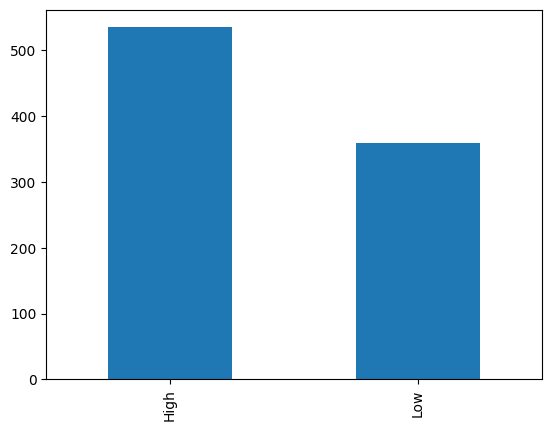

In [17]:
df['high_traffic'].value_counts().plot(kind='bar') #assessing class balance, somewhat balanced

In [18]:
cat_list=['Lunch/Snacks', 'Beverages', 'Potato',
'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal']

In [19]:
df['category']=df['category'].str.replace('Chicken Breast','Chicken')

In [20]:
df['category']=df['category'].astype('category')

In [21]:
df['high_traffic']=df['high_traffic'].astype('category')

In [22]:
df[['calories','carbohydrate','sugar','protein','servings']]=df[['calories','carbohydrate','sugar','protein','servings']].div(df['servings'], axis=0)

## - Exploratory Analysis:  

○ Two different types of graphic showing single variables only
○ At least one graphic showing two or more variables
○ Description of your findings: 
per stacked histogram, high traffice tend to correlate with high numbered categories. 

<AxesSubplot: xlabel='high_traffic', ylabel='calories'>

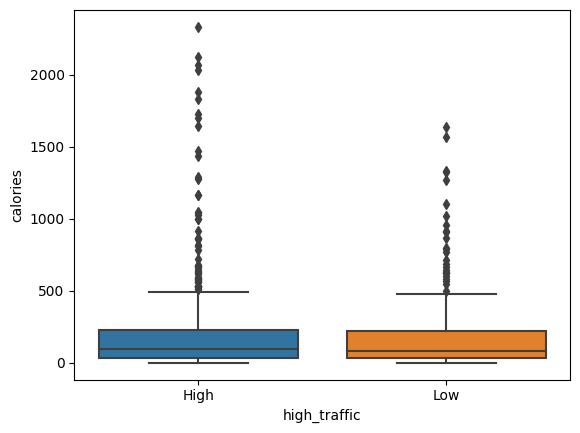

In [23]:
sns.boxplot(data=df, x='high_traffic', y='calories') #likely need scaling

<AxesSubplot: >

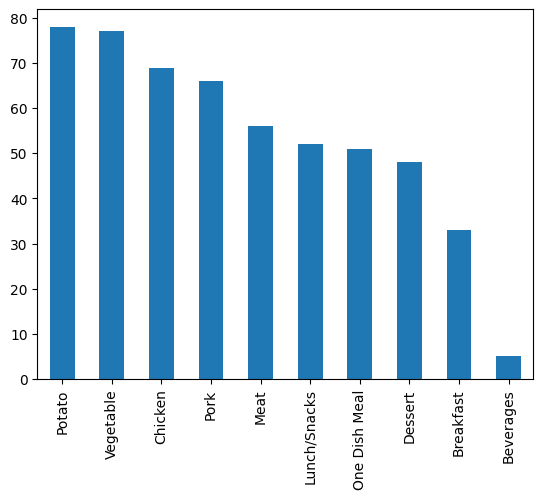

In [24]:
df_high=df[df['high_traffic']=='High']
df_high['category'].value_counts().plot(kind='bar')

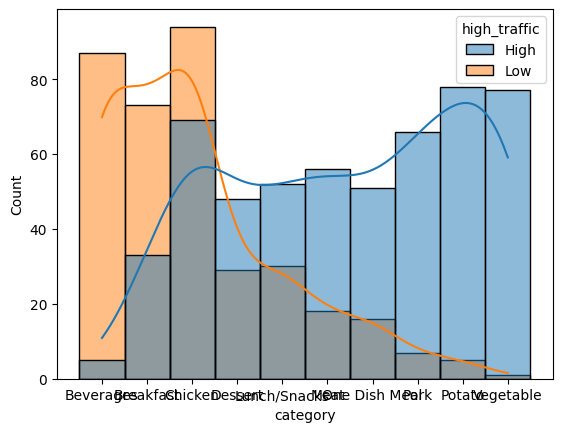

In [25]:
sns.histplot(data=df, x="category", hue="high_traffic", kde=True)
plt.show()

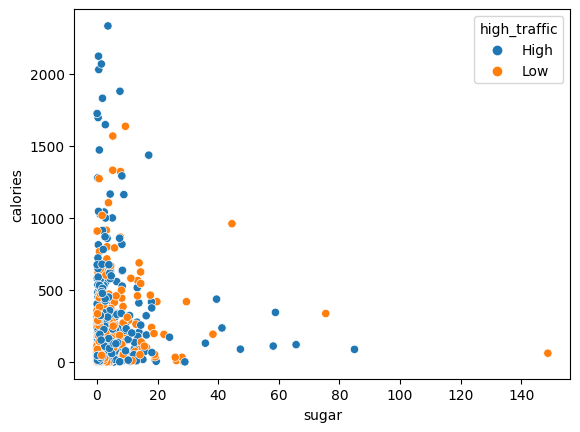

In [26]:
sns.scatterplot(data=df, x='sugar', y='calories', hue='high_traffic')
plt.show()

In [27]:
le=LabelEncoder()

In [28]:
df['high_traffic_enc']=le.fit_transform(df['high_traffic'])

In [29]:
df_dummies=pd.get_dummies(df['category'])

In [30]:
df=pd.concat([df,df_dummies], axis=1)

In [31]:
df_ml=df.drop(['servings','category','high_traffic'],axis=1)

In [32]:
df_ml.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein',
       'high_traffic_enc', 'Beverages', 'Breakfast', 'Chicken', 'Dessert',
       'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable'],
      dtype='object')

# next steps: bagging, boosting, voting classifier?

In [33]:
pca=PCA()


In [34]:
df.corr()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic_enc,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
recipe,1.000000,-0.031496,0.021465,-0.013928,-0.054238,NaN,-0.026989,0.004143,-0.098952,-0.002977,-0.006742,0.018320,0.008508,0.003913,0.050770,0.052787,-0.014573
calories,-0.031496,1.000000,0.194740,0.050738,0.339554,NaN,-0.050761,-0.126977,-0.025852,0.073864,-0.055038,0.037427,0.064103,0.101363,0.051729,-0.006093,-0.119397
carbohydrate,0.021465,0.194740,1.000000,0.201470,0.167230,NaN,-0.061305,-0.110210,0.055820,-0.070892,0.094884,0.044553,-0.058495,0.068983,-0.042115,0.120485,-0.078468
sugar,-0.013928,0.050738,0.201470,1.000000,0.011876,NaN,0.058915,0.062350,-0.036961,-0.081072,0.427718,-0.058963,-0.047513,-0.041982,-0.027726,-0.086240,-0.077623
protein,-0.054238,0.339554,0.167230,0.011876,1.000000,NaN,-0.030461,-0.181970,-0.025611,0.275163,-0.127162,-0.032585,0.094969,0.090597,0.085781,-0.118450,-0.130183
servings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high_traffic_enc,-0.026989,-0.050761,-0.061305,0.058915,-0.030461,NaN,1.000000,0.375115,0.214116,0.167884,-0.016025,-0.023563,-0.097345,-0.094808,-0.186179,-0.222984,-0.245382
Beverages,0.004143,-0.126977,-0.110210,0.062350,-0.181970,NaN,0.375115,1.000000,-0.124065,-0.159726,-0.103850,-0.107497,-0.101620,-0.096285,-0.100870,-0.108217,-0.104586
Breakfast,-0.098952,-0.025852,0.055820,-0.036961,-0.025611,NaN,0.214116,-0.124065,1.000000,-0.172963,-0.112456,-0.116406,-0.110042,-0.104265,-0.109230,-0.117186,-0.113253
Chicken,-0.002977,0.073864,-0.070892,-0.081072,0.275163,NaN,0.167884,-0.159726,-0.172963,1.000000,-0.144779,-0.149865,-0.141672,-0.134233,-0.140625,-0.150869,-0.145806


● Model Development including:
○ What type of problem this is: classification
○ Fitting a baseline model: decision tree, dt
○ Fitting a comparison model: randomforest, rf

In [35]:
y= df_ml['high_traffic_enc']
X=df_ml.drop(['high_traffic_enc','recipe'],axis=1)
X_train,X_test,y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.fit(X_test_scaled)
print(pca.explained_variance_ratio_)

[1.93733817e-01 1.00073131e-01 9.18620302e-02 9.11506897e-02
 8.21385160e-02 7.62108245e-02 7.58519780e-02 7.02971595e-02
 6.44442502e-02 5.83130807e-02 5.31044226e-02 3.09565516e-02
 1.18635487e-02 3.31050276e-33]


In [36]:
dt = DecisionTreeClassifier(max_depth=4, max_features= 0.7, min_samples_leaf= 0.08)
dt.fit(X_train_scaled,y_train)
dt_pred=dt.predict(X_test_scaled)
dt_score=accuracy_score(dt_pred,y_test)
dt_score

0.7472118959107806

In [37]:

kf=KFold(n_splits=5, shuffle=True, random_state=21)

params_dt=params_dt={'max_depth':[1,2,3,4,5,6,], 'min_samples_leaf':[0.04,0.06,0.08,0.1,0.12,0.14], 'max_features':[0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
grid_dt=GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy',cv=kf,n_jobs=1)
grid_dt.fit(X_train_scaled,y_train)
grid_dt.best_params_


{'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 0.08}

In [38]:
grid_dt.best_score_

0.7683301587301588

In [39]:
rf=RandomForestClassifier(max_depth=8,max_features='log2',
 min_samples_leaf=0.01,
n_estimators=100)
rf.fit(X_train_scaled,y_train)
rf_pred=rf.predict(X_test_scaled)
rf_score=accuracy_score(rf_pred,y_test)
rf_score


0.7211895910780669

In [40]:

kf=KFold(n_splits=5, shuffle=True, random_state=21)

params_rf={'n_estimators':[10,25,50,100,200], 'max_depth':[5,6,7,8,9,10], 'min_samples_leaf':[0.01,0.02,.035,0.05,0.1,0.15], 'max_features':['log2','sqrt']}
grid_rf=GridSearchCV(estimator=rf, param_grid=params_rf, cv=kf, scoring="accuracy", verbose=1, n_jobs=1)
grid_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=RandomForestClassifier(max_depth=8, max_features='log2',
                                              min_samples_leaf=0.01),
             n_jobs=1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.01, 0.02, 0.035, 0.05, 0.1,
                                              0.15],
                         'n_estimators': [10, 25, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [41]:
grid_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.035,
 'n_estimators': 100}

In [42]:
grid_rf.best_score_

0.7619301587301587

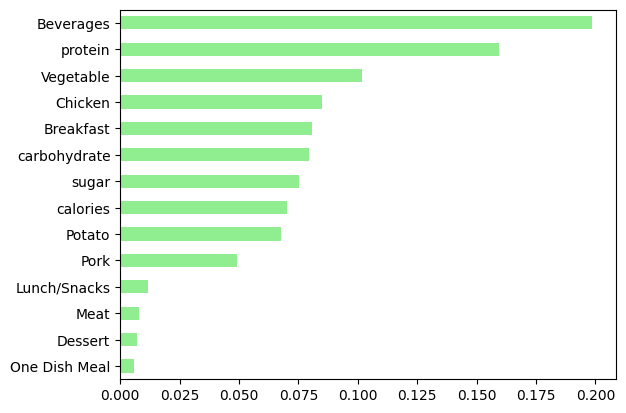

In [43]:
importances=pd.Series(data=rf.feature_importances_, index=X_train.columns)
importances_sorted=importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.show()

- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric:
  - Accuracy scores of decision tree is 0.7683301587301588 ,accuracy score of random forest classifier is 0.7619301587301587. They are very close, but we are unable to get close to 80% target accuracy rate, despite boosting/ensemble and hyperparameter tuning techninques. 

In [44]:
knn=KNeighborsClassifier(n_neighbors=19) #based on peak of test accuracy on graph
knn.fit(X_train_scaled, y_train)
knn_pred=knn.predict(X_test_scaled)
knn_score=accuracy_score(knn_pred,y_test)
knn_score

0.758364312267658

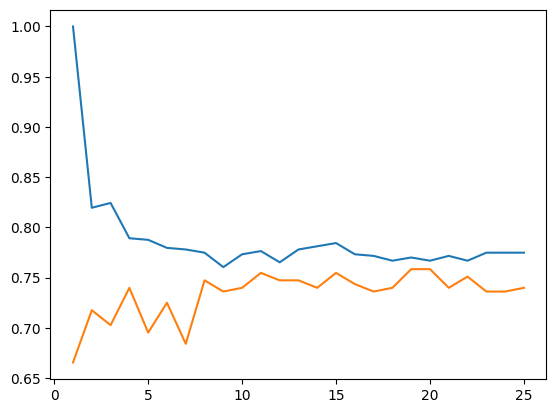

In [45]:
train_accuracies={}
test_accuracies={}
neighbors=np.arange(1,26)
for neighbor in neighbors:
    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled,y_train)
    train_accuracies[neighbor]=knn.score(X_train_scaled,y_train)
    test_accuracies[neighbor]=knn.score(X_test_scaled,y_test)
plt.plot(neighbors,train_accuracies.values())
plt.plot(neighbors,test_accuracies.values())
plt.show()

In [46]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred=lr.predict(X_test_scaled)
lr_score=accuracy_score(lr_pred,y_test)
lr_score

0.758364312267658

In [47]:
gb_clf=GradientBoostingClassifier(max_depth=8,subsample=0.7, max_features=0.2,random_state=12, n_estimators=300)
gb_clf.fit(X_train_scaled, y_train)
gb_clf_pred=gb_clf.predict(X_test_scaled)
gb_score=accuracy_score(gb_clf_pred, y_test)
gb_score

0.7509293680297398

In [48]:
classifiers = [ ('Classification Tree', dt),('Random Forest', rf), ('K Nearest Neighbours', knn),('logistic regression', lr)]
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train_scaled, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Classification Tree : 0.688
Random Forest : 0.729
K Nearest Neighbours : 0.740
logistic regression : 0.758


In [49]:

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train_scaled, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.747


In [54]:
xg_cl=xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=12)
xg_cl.fit(X_train_scaled, y_train)
xg_pred=xg_cl.predict(X_test_scaled)
xg_score=float(np.sum(xg_pred==y_test))/y_test.shape[0]
xg_score

0.7323420074349443

Definition of a metric for the business to monitor
-How should the business monitor what they want to achieve?
In order to improve performace of future modeling, we suggest to start tracking subscription volume (and dollar sales) that were directed from clicks, in addition to tracking specific volumn of traffic instead of currently "high" or "low" traffic. This way we will be more confident we can achieve target prediction accuracy of 80% using different modeling techniques. 
-Estimate the initial value(s) for the metric based on the current data
For example, if we can improve accuracy of the prediction by 4%, to target of 80%, this would be incremental subscription of 4% increase on the 40% estimated increase in traffic. Assuming 40% leads to 40% increase in sales, this could mean a 0.4*0.04=0.016 or 1.6% increase in revenue. 

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation